In [171]:
%run ./func.ipynb

In [172]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Premi

In [173]:
I = J = 50

num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, I, J, seed=42)

alpha = 0
beta = 0.1

p = 2
r = 2

h_i = np.full(I, 1 / I)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [174]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
w_ij = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", w_ij)

# U_i^L の計算
Ui_L = compute_Ui_L(w_ij, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(w_ij, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[22.09072203 10.44030651 31.11269837 ... 18.60107524 21.9317122
   2.82842712]
 [36.40054945 37.12142239 22.56102835 ... 40.85339643 18.60107524
  25.07987241]
 [30.59411708 11.18033989 42.42640687 ...  7.61577311 33.24154028
  11.66190379]
 ...
 [23.53720459  5.         37.01351105 ... 14.56021978 28.01785145
   9.05538514]
 [15.62049935 35.22782991 15.62049935 ... 51.4781507  18.02775638
  34.92849839]
 [35.34119409 40.19950248 17.         ... 46.5295605  16.1245155
  29.41088234]]

w_ij Matrix: [[0.10980248 0.3520329  0.04454436 ... 0.15565589 0.1115624  0.75363832]
 [0.0262509  0.02442514 0.10475795 ... 0.01681743 0.15565589 0.08143198]
 [0.04691529 0.3269219  0.0143696  ... 0.46692935 0.03600296 0.31155158]
 ...
 [0.095015   0.60653066 0.02469014 ... 0.23316196 0.0607016  0.40432409]
 [0.20970575 0.02951717 0.20970575 ... 0.00581209 0.16484071 0.03041407]
 [0.02918445 0.01795386 0.18268352 ... 0.00953338 0.19939818 0.05280823]]

U_i^L: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [175]:
x_opt, y_opt, gamma, hist_Lhat, hist_Lcont, hist_dx, hist_dy = ogda_dinkelbach(w_ij, Ui_L, Ui_F, h_i, p, r)
print("x:", np.round(x_opt, 3))
print("y:", np.round(y_opt, 3))


🌸🌸🌸  Iteration 1  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ x ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ y (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
     ➤ y ( binbin): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
📈  Objective L(x, y) = 0.371348
📈  Objective L̂(x, y) = 0.371348
🔍  dx = 4.70e-03, dy = 7.37e-03

🌸🌸🌸  Iteration 2  🌸🌸🌸
🔧  After rounding:
     ➤ x (rounded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

In [176]:
x_bin = round_to_binary_best_k(x_opt, p)
print("Binary x:", np.round(x_bin, 3))
y_bin = round_to_binary_best_k(y_opt, r)
print("Binary y:", np.round(y_bin, 3))

Binary x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Binary y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [177]:
print('l', compute_L(h_i, Ui_L, Ui_F, w_ij, x_bin, y_bin))

l 0.3713483827019262


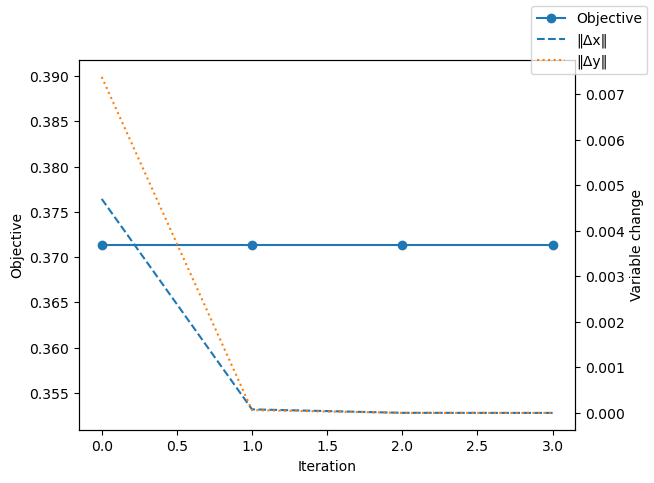

In [178]:
fig, ax1 = plt.subplots()
ax1.plot(hist_Lcont, label='Objective', marker='o')
ax2 = ax1.twinx()
ax2.plot(hist_dx,  label='‖Δx‖',  ls='--')
ax2.plot(hist_dy,  label='‖Δy‖',  ls=':')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax2.set_ylabel('Variable change')
fig.legend(loc='upper right')
plt.show()

In [179]:
print('sum x:', np.sum(x_opt))
print('sum y:', np.sum(y_opt))

sum x: 2.0
sum y: 1.9999999999999998
